In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
#Lets load data
df = pd.read_csv('/content/drive/MyDrive/dataset/diamonds.csv')

In [6]:
# Lets check the shape of data
print(f"the number of rows: = ({df.shape[0]})\nThe number of columns: = ({df.shape[1]})")

the number of rows: = (53940)
The number of columns: = (10)


# Preprocessing
* steps of preprocessing
** 1.Handling missing values
** 2.Handling potliers
** 3.Encoding variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


* Checking missing values

In [8]:
missing_val = df.isnull().sum()
per = df.isnull().sum() / df.isnull().count()
missing_data = pd.concat([missing_val, per], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
carat,0,0.0
cut,0,0.0
color,0,0.0
clarity,0,0.0
depth,0,0.0
table,0,0.0
price,0,0.0
x,0,0.0
y,0,0.0
z,0,0.0


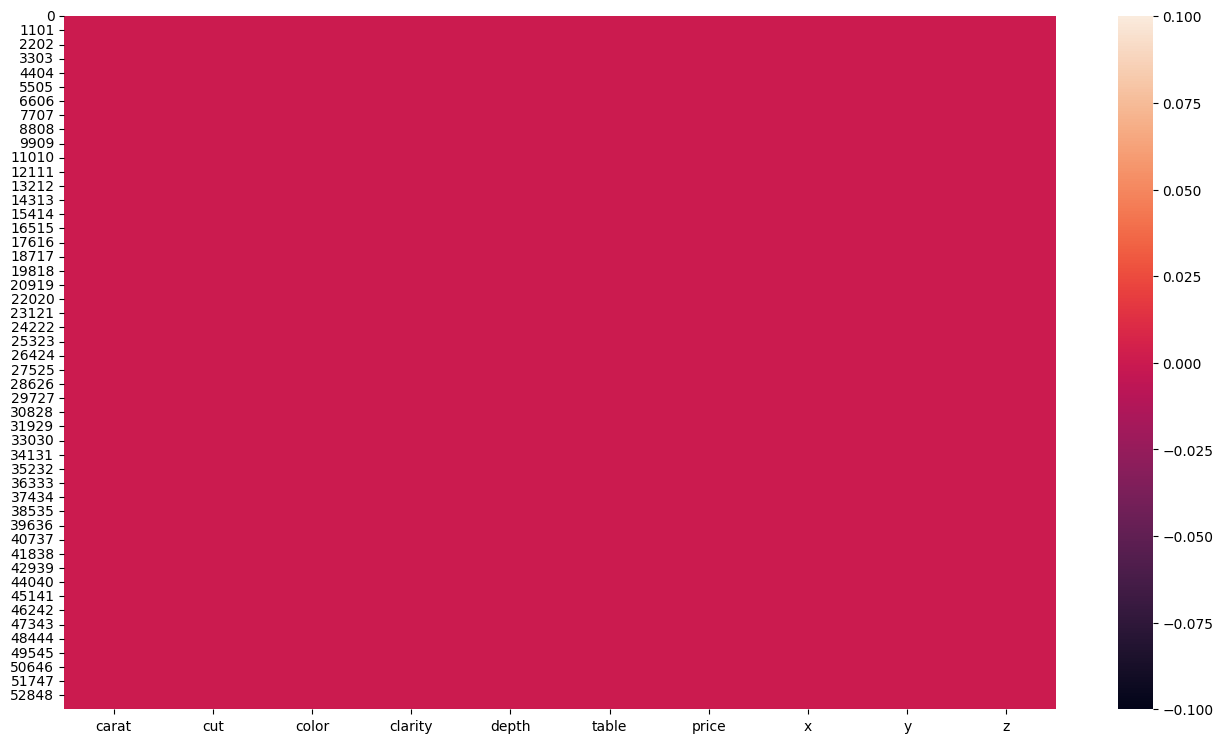

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(df.isnull())
plt.show()

* According to plot and above missing_data there is no missing vale

##  Checking outliers

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


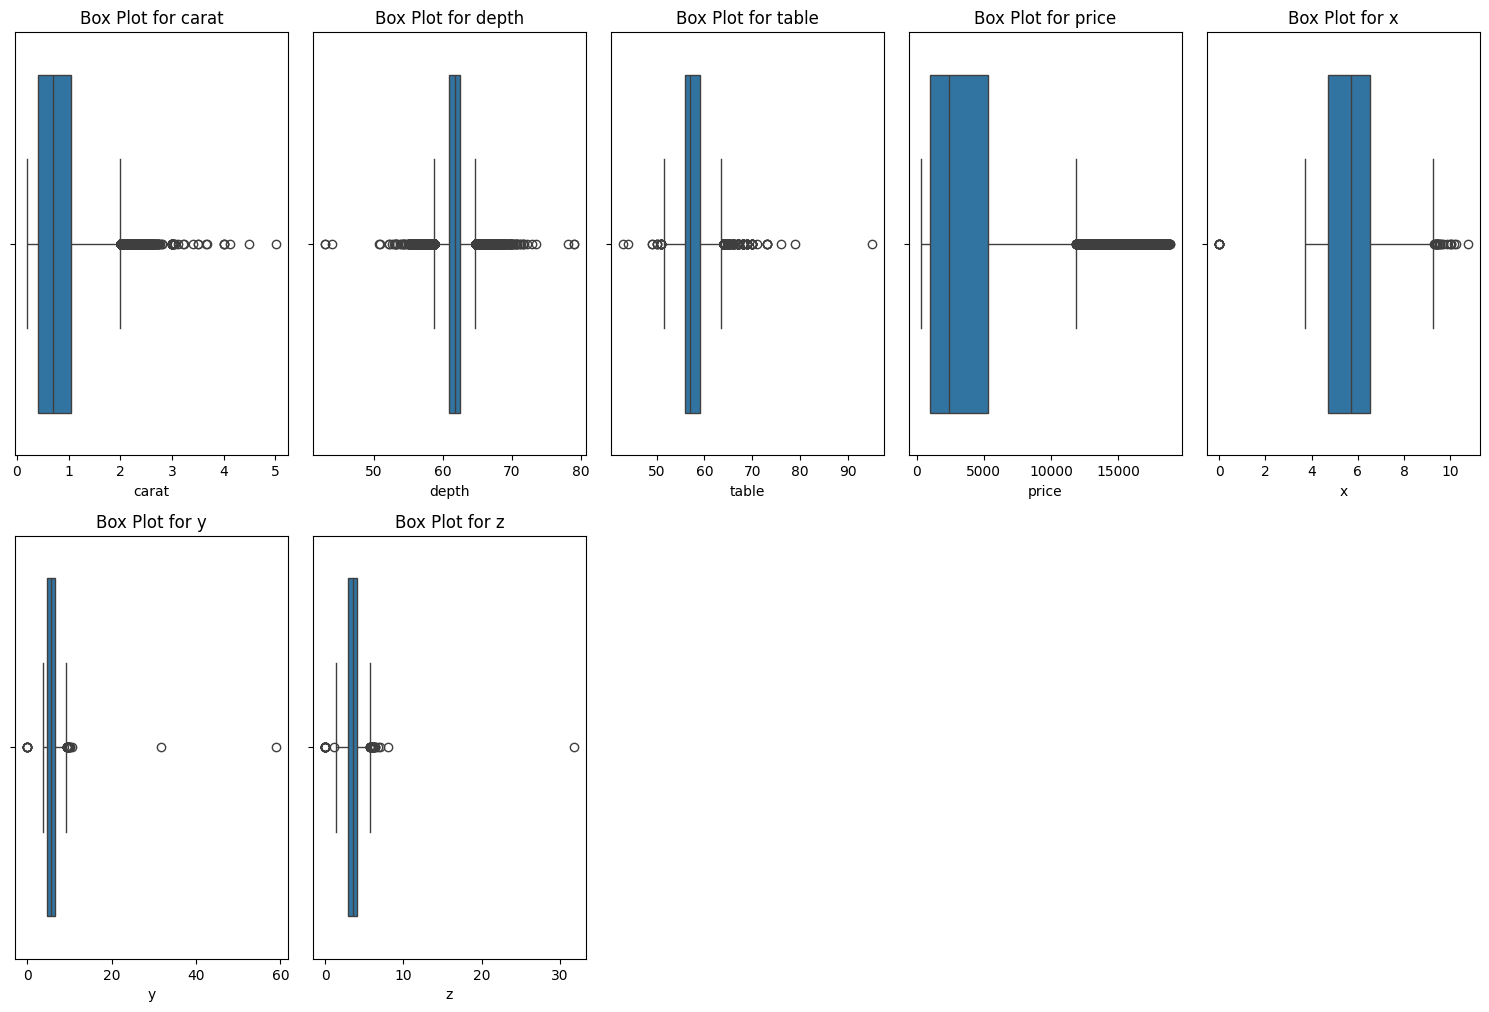

In [9]:
num_feat = df.select_dtypes(include=['number'])
feat = len(num_feat.columns)
num_rows = 8
num_cols = 5
fig, axis = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,40))
axis = axis.flatten()
# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(num_feat.columns):
    if i < feat:
        sns.boxplot(x=df[column], ax=axis[i])
        axis[i].set_title(f'Box Plot for {column}')

 # Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(num_feat.columns), len(axis)):
    fig.delaxes(axis[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


*   According to above boxplot and Satatics Summary There is an Outliers:
*   **Points to notice:**


* According to Satatics Summary Min value of **"x", "y", "z"** are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

### Handling outliers

In [10]:
# Select numerical features
num_feat = df.select_dtypes(include=['number'])

# Define the IQR multiplier threshold
iqr_multiplier = 1.5

# Iterate over each numerical feature
for column in num_feat.columns:
    # Calculate the IQR for the current feature
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr

    # Filter out the outliers for the current feature
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

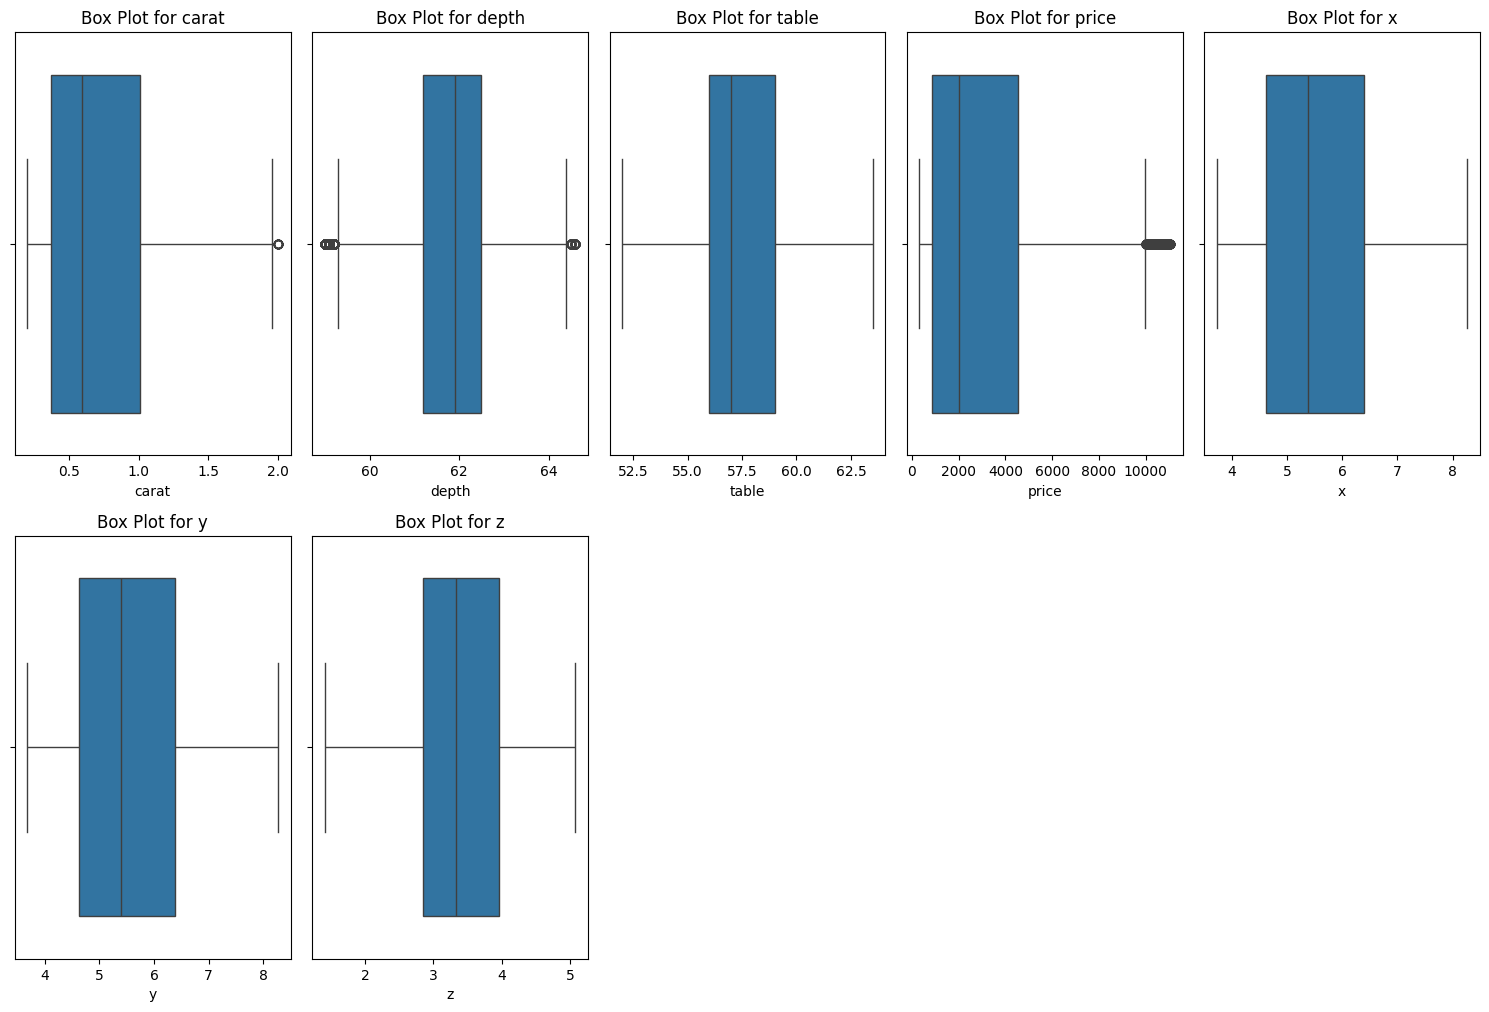

In [ ]:
num_feat = df.select_dtypes(include=['number'])
feat = len(num_feat.columns)
num_rows = 8
num_cols = 5
fig, axis = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,40))
axis = axis.flatten()
# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(num_feat.columns):
    if i < feat:
        sns.boxplot(x=df[column], ax=axis[i])
        axis[i].set_title(f'Box Plot for {column}')

 # Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(num_feat.columns), len(axis)):
    fig.delaxes(axis[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,46532.000000,46532.000000,46532.000000,46532.000000,46532.000000,46532.000000,46532.000000
mean,0.697966,61.804302,57.238621,2999.000107,5.521339,5.526371,3.413855
std,0.362025,1.077341,2.013841,2598.654394,0.964476,0.958648,0.597215
min,0.200000,59.000000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.370000,61.200000,56.000000,880.000000,4.620000,4.630000,2.850000
50%,0.590000,61.900000,57.000000,2002.500000,5.390000,5.400000,3.330000
75%,1.010000,62.500000,59.000000,4523.000000,6.390000,6.390000,3.960000
max,2.000000,64.600000,63.500000,11040.000000,8.270000,8.270000,5.080000


* Solved the Min value of **"x", "y", "z"** are zero
* Outliers also be solved

In [ ]:
# Create a pair plot of all data
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

* That's a much cleaner data

## Checking correlation*

In [ ]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.043724,0.189864,0.924790,0.986594,0.985719,0.985459
depth,0.043724,1.000000,-0.227730,0.014074,-0.002713,-0.004540,0.098628
table,0.189864,-0.227730,1.000000,0.140734,0.187542,0.182032,0.161783
price,0.924790,0.014074,0.140734,1.000000,0.904027,0.905075,0.900900
x,0.986594,-0.002713,0.187542,0.904027,1.000000,0.998496,0.993499
y,0.985719,-0.004540,0.182032,0.905075,0.998496,1.000000,0.993305
z,0.985459,0.098628,0.161783,0.900900,0.993499,0.993305,1.000000


<ipython-input-16-bd8f1f4d8ee1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

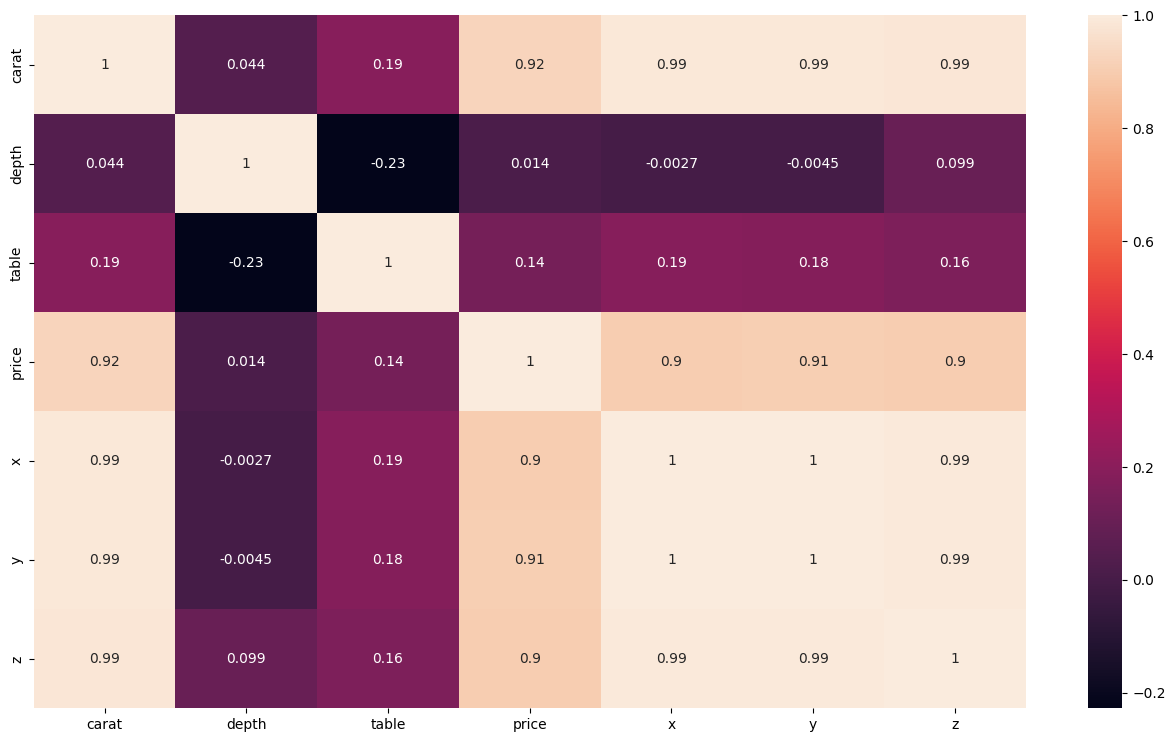

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot = True)

**High correlation with price**


1.   carat
2.   x
3.   y
3.   z
**No correlation with price**
1.   depth
2.   table


# Dealing with categorical features

In [ ]:
df.describe(include = 'O')

,cut,color,clarity
count,46532,46532,46532
unique,5,7,8
top,Ideal,G,SI1
freq,20096,9868,11271


* Categorical variables:
* ['cut', 'color', 'clarity']
* cut ->Premium --->[Very Good ,Good ,Fair]
* color ->color ---> [
G
E
F
H
D
I
J]

In [ ]:
df['color'].value_counts()

G    9868
E    8740
F    8289
H    6983
D    6070
I    4379
J    2203
Name: color, dtype: int64


1.   LabelEncoding Categorical data using for loop




In [11]:
# encode the categorical variable using using for loop where object and categorical data
le = LabelEncoder()
for i in df.columns:
  if df[i].dtypes == 'object' or df[i].dtypes == 'category':
   df[i] = le.fit_transform(df[i])

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48



**Model** **Building**

   Steps involved


1.   spliting data into x and y
2.   Train, test Splitting data
3.   Model Call
4.   Predicting using x_test
5.   Model evaluting

 1 Splitting data into X and Y

In [12]:
x = df.drop(columns = 'price', axis=1)
y = df['price']

2 train test split

In [13]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

3 Model calling

In [15]:
#Lets call the model
Linear = LinearRegression()
# svn -> svr-> suport vector regression
svm = SVR()
# Decision tree
tree = DecisionTreeRegressor()

4Train the Mode

In [16]:
#Train the Model
Linear.fit(x_train, y_train)
# SVR train the model
svm.fit(x_train, y_train)
# tree train model
tree.fit(x_train, y_train)

DecisionTreeRegressor()

* Predict the data

In [19]:
# Predict the data
y_pred = Linear.predict(x_test)
# svm prediction
y_pred1 = svm.predict(x_test)
#predict the decision tree
y_tree_pred = tree.predict(x_test)

# knn regression

In [ ]:
# knn regression
knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)# model train
knn.fit(x_train, y_train)
# predtion
y_kn_pred = knn.predict(x_test)

* Comparison of actual and predict

In [ ]:
# comparison of actual and predidcit value
df1 = pd.DataFrame({'Actual':y_test, 'predict': y_pred})
df1.head(10)

,Actual,predict
11091,4928,5113.564989
42386,1306,2178.202587
4213,3567,3498.948938
52790,2568,2431.906139
34504,868,1619.680994
38320,1020,1227.871705
49755,2159,2883.967630
34628,872,1106.684194
22712,10730,11386.301451
52011,2444,2809.512422


In [ ]:
# comparison of svm in actual and predidcit value
df2 = pd.DataFrame({'Actual':y_test, 'predict': y_pred1})
df2.head(10)

,Actual,predict
11091,4928,2023.585933
42386,1306,2005.308557
4213,3567,1998.671656
52790,2568,1994.451701
34504,868,1978.626323
38320,1020,2009.860787
49755,2159,2025.710140
34628,872,1945.755581
22712,10730,2086.282450
52011,2444,2038.623692


In [ ]:
# comparison of knn in actual and predidcit value
df3 = pd.DataFrame({'Actual':y_test, 'predict': y_kn_pred})
df3.head(10)

,Actual,predict
11091,4928,6557.2
42386,1306,1592.8
4213,3567,3102.0
52790,2568,1945.4
34504,868,1288.8
38320,1020,978.0
49755,2159,2586.4
34628,872,770.2
22712,10730,9794.0
52011,2444,3172.6


In [20]:
# comparison of svm in actual and predidcit value
df5 = pd.DataFrame({'Actual':y_test, 'predict': y_tree_pred})
df5.head(10)

,Actual,predict
43418,1413,1547.0
21090,9260,9225.0
53155,2624,2015.0
30956,449,408.0
14513,5863,4290.0
10894,4884,4570.0
23014,630,675.0
51739,2403,2161.0
22697,630,630.0
15080,6061,5042.0


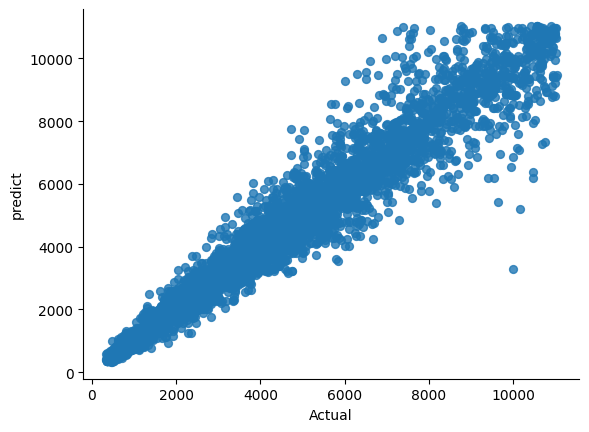

In [21]:
#  Actual vs predict
df5.plot(kind='scatter', x='Actual', y='predict', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

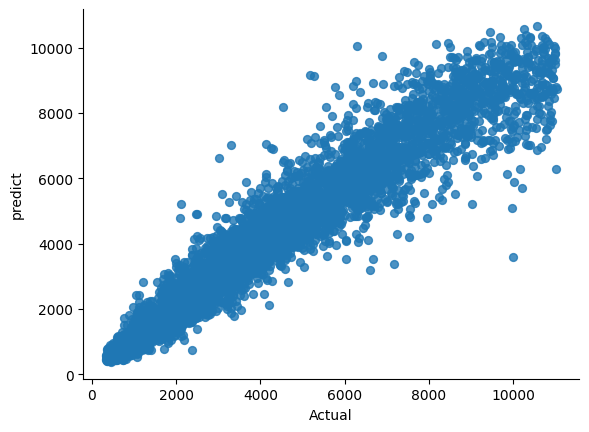

In [ ]:
#  Actual vs predict --->knn
df3.plot(kind='scatter', x='Actual', y='predict', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

good regresson

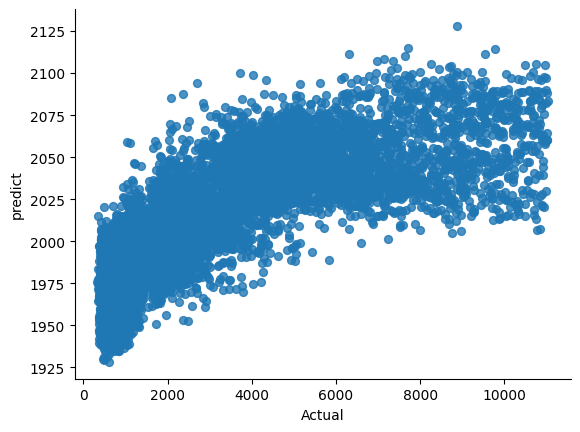

In [ ]:
# Svm Actual vs predict--->svm

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='Actual', y='predict', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

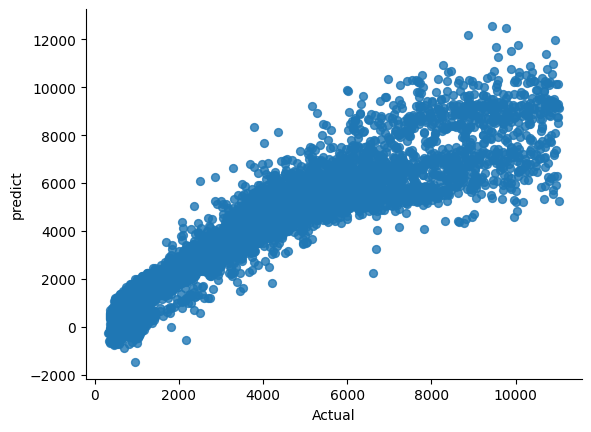

In [ ]:
# Actual vs predict--->regresion

df1.plot(kind='scatter', x='Actual', y='predict', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Model evalution

In [ ]:
# evaluate the model
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

Mean Squared Error (MSE): 759413.0312678793
Root Mean Squared Error (RMSE): 871.443074025997
Mean Absolute Error (MAE): 584.0059436626744
R-squared (R^2): 0.8901542106127357


SVR evaluating

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

Mean Squared Error (MSE): 7814087.724389043
Root Mean Squared Error (RMSE): 2795.368978218983
Mean Absolute Error (MAE): 2008.3017303687843
R-squared (R^2): -0.1302737760422623


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_kn_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_kn_pred)
r2 = r2_score(y_test, y_kn_pred)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

Mean Squared Error (MSE): 361463.60531213065
Root Mean Squared Error (RMSE): 601.2184339423823
Mean Absolute Error (MAE): 354.9688191683679
R-squared (R^2): 0.947715862876375


# Model evalution of Decision tree

In [22]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_tree_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_tree_pred)
r2 = r2_score(y_test, y_tree_pred)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

Mean Squared Error (MSE): 243539.67473407113
Root Mean Squared Error (RMSE): 493.4973908077642
Mean Absolute Error (MAE): 261.3108950252498
R-squared (R^2): 0.9643944468605108


* knn -> R-squared (R^2): 0.947715862876375
* DT -> R-squared (R^2): 0.9643944468605108
* SVR -> R-squared (R^2): -0.1302737760422623
* Linear Regression -> R-squared (R^2): 0.8901542106127357

we are observing R-squared value
* Decision tree have high accuracy
* Knn
* LR